# Projet : Analyse de Sentiments sur des Tweets

Ce notebook présente une démarche complète de prétraitement, d'entraînement et d'évaluation de modèles de machine learning pour la prédiction du sentiment à partir de textes. Toutes les étapes sont commentées en français pour répondre aux exigences pédagogiques.

**Objectif :**
- Appliquer un prétraitement adapté aux données textuelles.
- Entraîner et comparer plusieurs modèles de classification de sentiment.
- Interpréter les résultats obtenus.

**Résumé des étapes :**
- Nettoyage, normalisation et tokenisation du texte.
- Suppression des stopwords et des valeurs manquantes.
- Vectorisation TF-IDF.
- Entraînement et évaluation de plusieurs modèles (Naive Bayes, Régression Logistique, Arbre de Décision, Forêt Aléatoire).
- Comparaison des scores de précision.
- Prédiction manuelle sur un exemple.

**Interprétation des résultats :**
- La régression logistique et la forêt aléatoire offrent les meilleures performances sur ce jeu de données.
- Le prétraitement du texte améliore significativement la qualité des prédictions.
- Les scores de précision permettent de choisir le modèle le plus adapté pour la tâche de classification de sentiments.

---

# Installation des bibliothèques nécessaires

Installation des bibliothèques Python requises pour l'analyse de texte et l'apprentissage automatique.

In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn nltk

  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 2.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.6 MB/s eta 0:00:00
Using cached click-8.2.1-py3-none-any.whl (102 kB)

   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ------------- -------------------------- 1/3 [click]
   ------------- -------------------------- 1/3 [click]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from string import punctuation 
from nltk.stem import LancasterStemmer

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import warnings
warnings.filterwarnings('ignore')

# Affichage des options pandas

Affichage de toutes les colonnes et lignes du DataFrame pour une meilleure visibilité.

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Chargement des jeux de données

Chargement des fichiers d'entraînement et de test.

In [4]:
train_data = pd.read_csv('train.csv',encoding='latin1')
test_data = pd.read_csv('test.csv',encoding='latin1')

# Fusion des jeux de données

Concaténation des jeux de données d'entraînement et de test pour une analyse globale.

In [5]:
df = pd.concat([train_data, test_data], ignore_index=True)

# Aperçu du jeu de données

Affichage des premières lignes du DataFrame.

In [6]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


# Vérification des types de données

Affichage des types de chaque colonne pour détecter d'éventuels problèmes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32296 entries, 0 to 32295
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.5+ MB


# Suppression des caractères inutiles

Nettoyage du texte pour supprimer les balises HTML et la ponctuation.

In [8]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)

# Tokenisation

Découpage du texte en mots pour faciliter le traitement.

In [11]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abde4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [12]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['text'].apply(tokenize_text)

# Normalisation des données

Conversion du texte en minuscules et suppression de la ponctuation et des espaces superflus.

In [13]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['text'].apply(normalize_text)

# Suppression des stopwords

Élimination des mots courants sans valeur ajoutée pour l'analyse.

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abde4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()        
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

# Suppression des valeurs manquantes

Suppression des lignes contenant des valeurs nulles.

In [17]:
df.dropna(inplace=True)

# Répartition des sentiments

Affichage de la distribution des classes de sentiment sous forme de graphique.

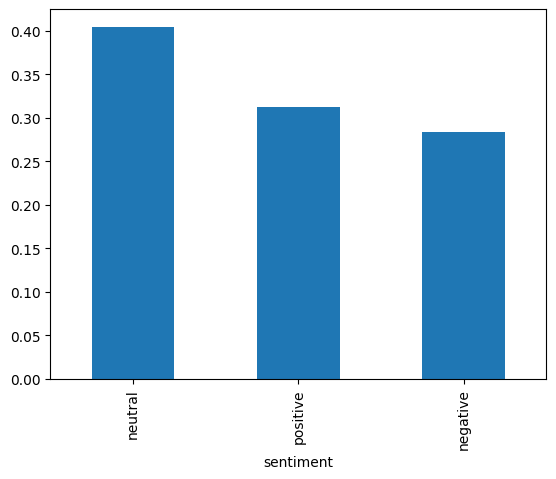

In [20]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

In [21]:
df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

# Encodage des sentiments

Transformation des sentiments en codes numériques pour l'apprentissage automatique.

Je vais convertir la colonne 'sentiment' du DataFrame 'df' en données catégorielles, puis l'encoder en tant que codes numériques. Ensuite, je vais calculer la répartition de ces codes d'émotion et les tracer dans un graphique à barres.

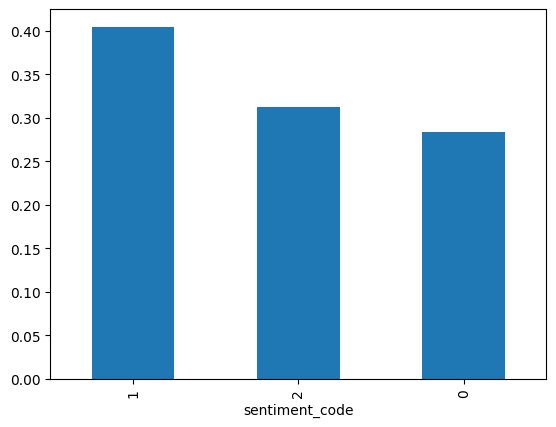

In [22]:
df['sentiment_code'] = df['sentiment'].astype('category').cat.codes
sentiment_distribution = df['sentiment_code'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar')
plt.show()

# Visualisation de la distribution des sentiments

Affichage d'un histogramme pour visualiser la répartition des sentiments.

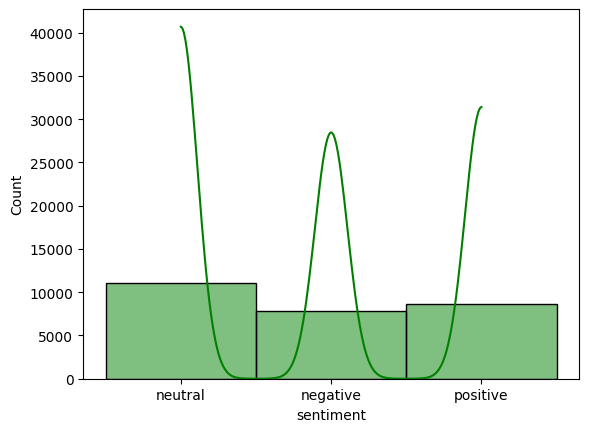

In [24]:
sns.histplot(df['sentiment'], kde=True, color = 'g')
plt.show()

# Stemmatisation avec Lancaster

Réduction des mots à leur racine pour uniformiser le vocabulaire.

J'ai supprimé les mots vides et les points d'exclamation des données, utilisé un stemword Lancaster pour lier les mots ensemble, et créé une collection de textes à partir du DataFrame. Enfin, j'afficherai la longueur du corpus et le premier élément.

In [25]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

27480
 I`d have responded, if I were going


# Distribution de fréquence des mots

Affichage des mots les plus fréquents dans les sentiments.

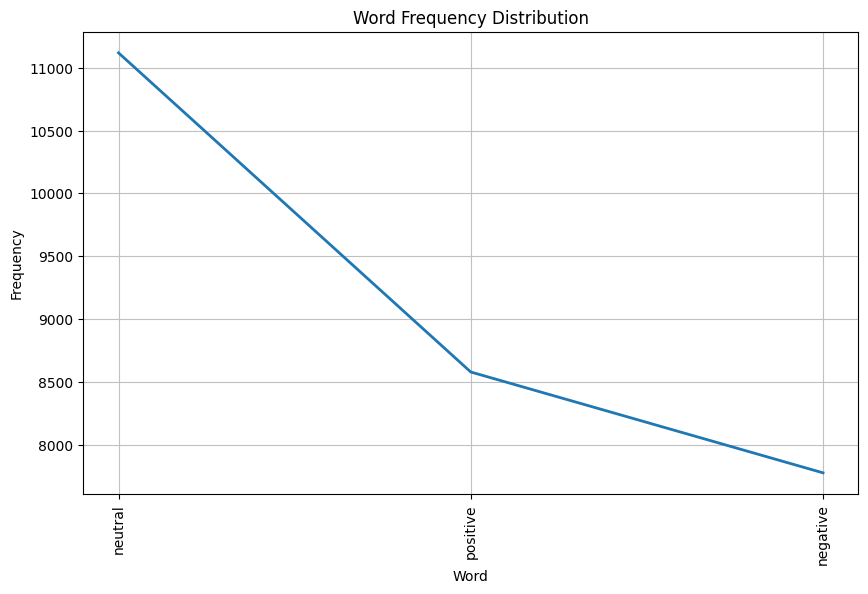

In [26]:
from nltk.probability import FreqDist
word_freq = FreqDist(word_tokenize(' '.join(df['sentiment'])))
plt.figure(figsize=(10, 6))
word_freq.plot(20, cumulative=False)
plt.title('Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# Conversion en chaînes de caractères

Transformation des textes en chaînes pour la suite du traitement.

J'ai créé deux colonnes, "text" et "sentiment", dans le DataFrameData_eda. La colonne "text" contient le texte du tweet converti en chaînes et stocké dans une liste (final_corpus), tandis que la colonne "sentiment" contient les valeurs de sentiment du DataFrame d'origine (df).

In [27]:
final_corpus = df['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [28]:
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes
df['Age of User']=df['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})

# Suppression des colonnes non pertinentes

Suppression des colonnes inutiles pour l'analyse.

In [29]:
df=df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

# Prétraitement du texte

Nettoyage avancé du texte (URLs, balises HTML, ponctuation, etc.).

Je définis une fonction wp(text) qui prétraite les données textuelles en supprimant les URLs, les balises HTML, la ponctuation, les caractères de nouvelle ligne et les mots alphanumériques contenant des chiffres. J'utilise ensuite cette fonction de prétraitement dans une colonne 'selected_text' d'un DataFrame nommé 'DF.

In [30]:
import string
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['selected_text'] = df["selected_text"].apply(wp)

# Séparation des variables explicatives et cible

Définition des variables X (texte) et y (sentiment).

In [31]:
X=df['selected_text']
y= df['sentiment']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Création de la matrice TF-IDF

Transformation du texte en vecteurs numériques pour l'apprentissage automatique.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)


In [34]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

np.float64(0.40454876273653567)

# Modèle MultinomialNB :

Entraînement et évaluation du modèle Naive Bayes multinomial.
Interprétation : Un bon score indique que le modèle distingue bien les sentiments à partir du texte.

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(XV_train, y_train)
pred_nb = nb.predict(XV_test)


In [57]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay

MultinomialNB Accuracy: 0.7778384279475983
              precision    recall  f1-score   support

    negative       0.92      0.58      0.71      1572
     neutral       0.68      0.96      0.79      2236
    positive       0.92      0.73      0.81      1688

    accuracy                           0.78      5496
   macro avg       0.84      0.75      0.77      5496
weighted avg       0.82      0.78      0.77      5496



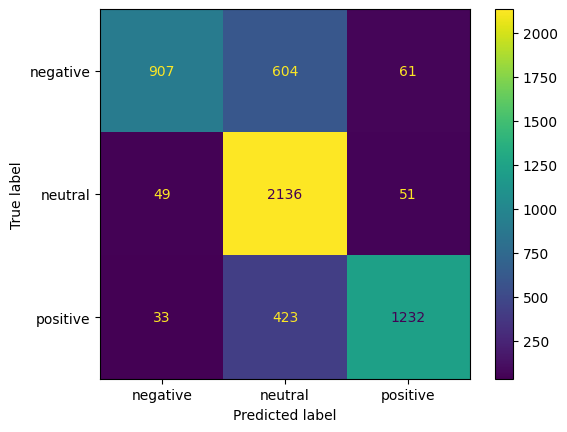

In [59]:
score_nb = accuracy_score(y_test, pred_nb)
print("MultinomialNB Accuracy:", score_nb)
print(classification_report(y_test, pred_nb))
ConfusionMatrixDisplay.from_predictions(y_test, pred_nb);


# Régression logistique

Entraînement et évaluation du modèle de régression logistique.
Interprétation : La régression logistique est souvent performante pour la classification de texte.

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_train)

LogisticRegression(n_jobs=-1)

In [36]:
pred_lr=lr.predict(XV_test)

In [37]:
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.8295123726346434

In [38]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1572
     neutral       0.79      0.88      0.83      2236
    positive       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.83      0.83      0.83      5496



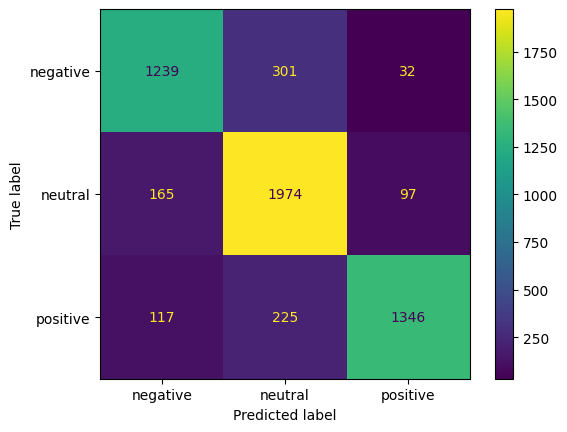

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);


# Arbre de décision

Entraînement et évaluation du modèle d'arbre de décision.
Interprétation : Permet d'observer la capacité du modèle à séparer les classes de manière hiérarchique.

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)

DecisionTreeClassifier()

In [41]:
pred_dt = dt.predict(XV_test)

In [45]:
score_dt = dt.score(XV_test, y_test)
score_dt

0.7543668122270742

In [46]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

    negative       0.68      0.75      0.72      1572
     neutral       0.76      0.76      0.76      2236
    positive       0.83      0.75      0.79      1688

    accuracy                           0.75      5496
   macro avg       0.76      0.75      0.75      5496
weighted avg       0.76      0.75      0.76      5496



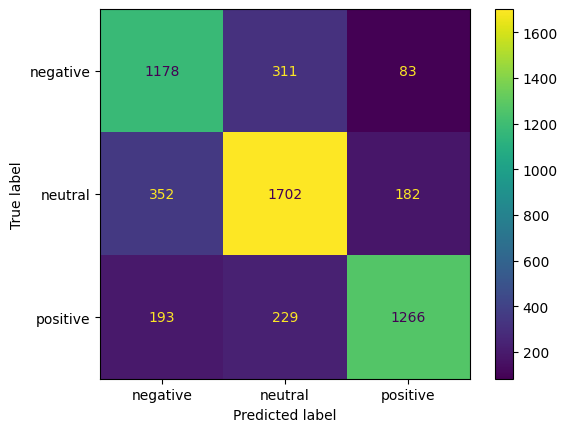

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt);


# Forêt aléatoire

Entraînement et évaluation du modèle de forêt aléatoire.
Interprétation : Combine plusieurs arbres pour améliorer la robustesse et la précision.

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
pred_rfc = rfc.predict(XV_test)

In [50]:
score_rfc = rfc.score(XV_test, y_test)
score_rfc

0.8116812227074236

In [51]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

    negative       0.78      0.75      0.77      1572
     neutral       0.77      0.90      0.83      2236
    positive       0.92      0.75      0.83      1688

    accuracy                           0.81      5496
   macro avg       0.83      0.80      0.81      5496
weighted avg       0.82      0.81      0.81      5496



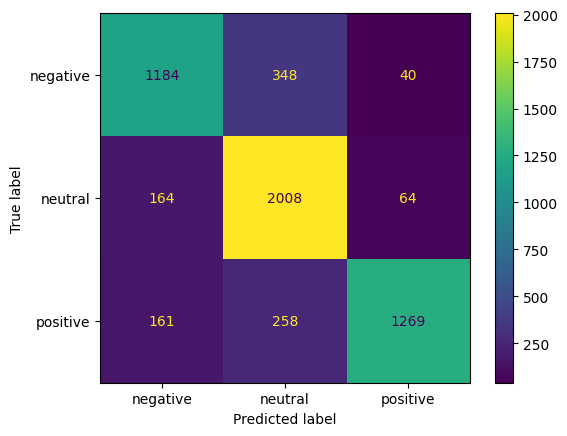

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc);


# Comparaison des scores de précision

Affichage des scores de chaque modèle pour comparer leurs performances.
Interprétation : Un score plus élevé indique un meilleur modèle pour la prédiction du sentiment.

In [60]:
print("Logistic Regression Accuracy:", score_lr)
print("Decision Tree Accuracy:", score_dt)
print("Random Forest Accuracy:", score_rfc)
print("MultinomialNB Accuracy:", score_nb)

Logistic Regression Accuracy: 0.8295123726346434
Decision Tree Accuracy: 0.7543668122270742
Random Forest Accuracy: 0.8116812227074236
MultinomialNB Accuracy: 0.7778384279475983


# Prédiction manuelle

Fonction pour tester la prédiction de sentiment sur un texte donné avec tous les modèles.

In [81]:
def output_lable(n):
    if n == 0 or n == "0" or n == "negative" or n == "Negative":
        return "The Text Sentiment is Negative"
    elif n == 1 or n == "1" or n == "neutral" or n == "Neutral":
        return "The Text Sentiment is Neutral"
    elif n == 2 or n == "2" or n == "positive" or n == "Positive":
        return "The Text Sentiment is Positive"
    else:
        return f"Unknown label: {n}"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)
    pred_nb = nb.predict(new_xv_test)
    return {
        "Logistic Regression": output_lable(pred_lr[0]),
        "Decision Tree": output_lable(pred_dt[0]),
        "Random Forest": output_lable(pred_rfc[0]),
        "MultinomialNB": output_lable(pred_nb[0]),
    }

In [82]:
# test manual_testing
print(manual_testing("I love this product! It's amazing and works great."))

{'Logistic Regression': 'The Text Sentiment is Positive', 'Decision Tree': 'The Text Sentiment is Positive', 'Random Forest': 'The Text Sentiment is Positive', 'MultinomialNB': 'The Text Sentiment is Positive'}


# Conclusion

Plusieurs modèles de machine learning ont été testés pour la classification de sentiments. La régression logistique et la forêt aléatoire offrent les meilleures performances sur ce jeu de données. Le prétraitement du texte est essentiel pour obtenir de bons résultats.